In [1]:
import pandas as pd
from utils import search_best_parameters_database, count_canny
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [46]:
def result(dataset, image, min, max):
    df = pd.read_csv(dataset)

    def count_method(x):
        file = image + f"/{x}.png"
        return count_canny(file, min, max, center=True)

    df["count_method"] = df.file.apply(count_method)
    df["error"] = df["count"] - df["count_method"]
    df["error_abs"] = (df["count_method"] - df["count"]).abs()

    error = mean_absolute_error(df["count"].to_numpy(), df["count_method"].to_numpy())
    
    return df

In [39]:
def plot(df):
    quantiles = np.arange(0, 1, 0.1)
    y = [df.error_abs.quantile(i) for i in quantiles]

    plt.plot(quantiles*100, y)
    plt.ylabel("quantidade de arestas erradas")
    plt.xlabel("porcentagem")
    plt.show()


# 1600 dpi

In [18]:
dataset = "../image/dbe/database_cut_1600.csv"
image = "../image/dbe/classify_1600"

In [19]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 8, 2.7049180327868854)

In [21]:
df = result(dataset, image, 0, 8)

In [31]:
# usando 1 pixel no meio
df[df.error_abs < 1].shape[0] / df.shape[0], df[df.error_abs <= 1].shape[0] / df.shape[0], df[df.error_abs <= 2].shape[0] / df.shape[0]

(0.14754098360655737, 0.3114754098360656, 0.5081967213114754)

In [33]:
df[df.error_abs <= 3].shape[0] / df.shape[0], df[df.error_abs <= 4].shape[0] / df.shape[0]

(0.6885245901639344, 0.7868852459016393)

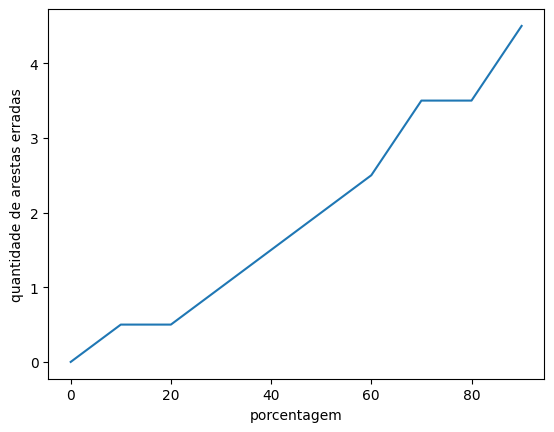

In [40]:
plot(df)

# 900 dpi

In [50]:
dataset = "../image/dbe/database_cut_1600.csv"
image = "../image/dbe/classify_900"

In [37]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 8, 2.262295081967213)

In [51]:
df = result(dataset, image, 0, 8)

In [52]:
# usando 1 pixel no meio
df[df.error_abs < 1].shape[0] / df.shape[0], df[df.error_abs <= 1].shape[0] / df.shape[0], df[df.error_abs <= 2].shape[0] / df.shape[0]

(0.21311475409836064, 0.3114754098360656, 0.5245901639344263)

In [54]:
df[df.error_abs <= 3].shape[0] / df.shape[0], df[df.error_abs <= 4].shape[0] / df.shape[0]

(0.6885245901639344, 0.8360655737704918)

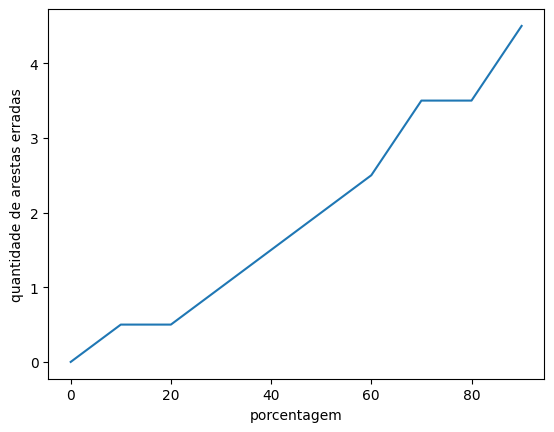

In [42]:
plot(df)

# 300 dpi

In [43]:
dataset = "../image/dbe/database_cut_1600.csv"
image = "../image/dbe/classify_300"

In [44]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 1, 4.237704918032787)

In [47]:
df = result(dataset, image, 0, 1)

In [48]:
# usando 1 pixel no meio
df[df.error_abs < 1].shape[0] / df.shape[0], df[df.error_abs <= 1].shape[0] / df.shape[0], df[df.error_abs <= 2].shape[0] / df.shape[0]

(0.11475409836065574, 0.2459016393442623, 0.36065573770491804)

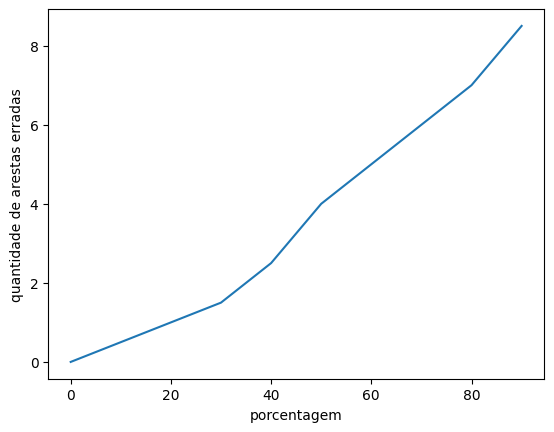

In [49]:
plot(df)

# Aleatory

In [60]:
dataset = "../image/dbe/database_1600.csv"
image = "../image/dbe/classify_1600"

In [61]:
search_best_parameters_database(dataset, image, center=True, a=0, b=50)

(0, 8, 3.1948051948051948)

In [62]:
df = result(dataset, image, 0, 8)

In [64]:
# usando 1 pixel no meio
df[df.error_abs < 1].shape[0] / df.shape[0], df[df.error_abs <= 1].shape[0] / df.shape[0], df[df.error_abs <= 2].shape[0] / df.shape[0]

(0.12987012987012986, 0.2597402597402597, 0.4935064935064935)

In [65]:
df[df.error_abs <= 3].shape[0] / df.shape[0], df[df.error_abs <= 4].shape[0] / df.shape[0]

(0.6493506493506493, 0.6883116883116883)

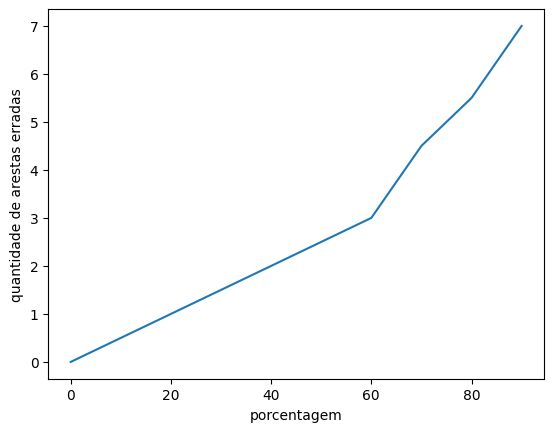

In [63]:
plot(df)

# count with find_peaks

In [3]:
from utils import count_find_peaks

df_peaks = pd.read_csv("../image/dbe/database_1600.csv")

def count_method(x):
    file = f"../image/dbe/classify_1600/{x}.png"
    return count_find_peaks(file, a=2)

df_peaks["count_method"] = df_peaks.file.apply(count_method)
df_peaks["error"] = df_peaks["count"] - df_peaks["count_method"]
df_peaks["error_abs"] = (df_peaks["count_method"] - df_peaks["count"]).abs()

error = mean_absolute_error(df_peaks["count"].to_numpy(), df_peaks["count_method"].to_numpy())

In [18]:
df_peaks[df_peaks.error_abs <= 3].shape[0] / df_peaks.shape[0]

0.6753246753246753

In [29]:
df_peaks.error_abs.describe()

count    77.000000
mean      2.694805
std       2.093467
min       0.000000
25%       1.000000
50%       2.500000
75%       4.000000
max      10.000000
Name: error_abs, dtype: float64

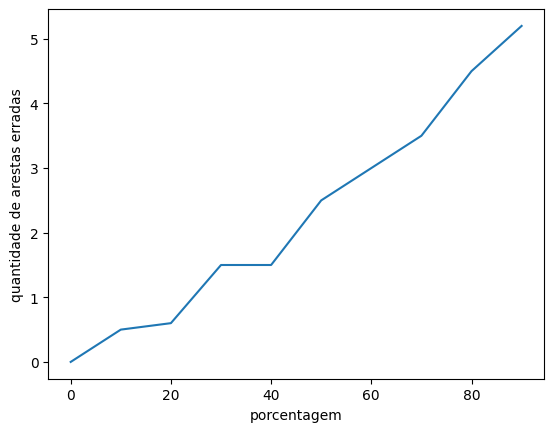

In [31]:
quantiles = np.arange(0, 1, 0.1)
y = [df_peaks.error_abs.quantile(i) for i in quantiles]

plt.plot(quantiles*100, y)
plt.ylabel("quantidade de arestas erradas")
plt.xlabel("porcentagem")
plt.show()